In [263]:
import numpy as np
import pandas as pd
from textblob import TextBlob
import nltk
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import NMF
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt

import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
%matplotlib inline

from gensim import corpora, models, similarities, matutils
#import logging
#logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

# 1.0 Loading Data and Stemming
First load the data that has only the nouns and adjectives

Because there are a lot of root word varation, I decided to stem the words

In [2]:
data = pd.read_pickle('/home/michael/Documents/Projects/beerreview/data/datanouns.pkl')

In [3]:
data.head()

,beer_style,nounadjtext
0,Hefeweizen,lot foam lot smell banana lactic tart good sta...
1,English Strong Ale,dark red color beige foam average smell malt c...
2,Foreign / Export Stout,black beige foam compact bad light smell bit r...
3,German Pilsener,golden yellow color white compact foam creamy ...
4,American Double / Imperial IPA,website style year current release dipa famili...


In [4]:
def stemmer(document):
    '''
    Function to stem every word, for consistency if the stem ends in i then it removes that i, thus breadiness becomes breadi becomes bread
    '''
    sno = nltk.stem.SnowballStemmer('english')
    doc = nltk.word_tokenize(document)
    
    wordlist = []
    for token in doc:
        stem = sno.stem(token)
        if stem[-1:] == 'i':
            stem = stem[:-1]
        wordlist.append(stem)
    return ' '.join(wordlist)

In [5]:
data['stemtext'] = data['nounadjtext'].map(stemmer)

In [6]:
data.head()

,beer_style,nounadjtext,stemtext
0,Hefeweizen,lot foam lot smell banana lactic tart good sta...,lot foam lot smell banana lactic tart good sta...
1,English Strong Ale,dark red color beige foam average smell malt c...,dark red color beig foam averag smell malt car...
2,Foreign / Export Stout,black beige foam compact bad light smell bit r...,black beig foam compact bad light smell bit ro...
3,German Pilsener,golden yellow color white compact foam creamy ...,golden yellow color white compact foam cream g...
4,American Double / Imperial IPA,website style year current release dipa famili...,websit style year current releas dipa familiar...


In [7]:
data.to_pickle('/home/michael/Documents/Projects/beerreview/data/datanounstem.pkl')

## 1.1 Aggregating by Style
Now that everything is stemmed, we then can aggregate by the beer style

In [3]:
data2 = pd.read_pickle('/home/michael/Documents/Projects/beerreview/data/datanounstem.pkl')

In [4]:
styledata = data2.groupby('beer_style',as_index = False)[['stemtext']].agg(lambda col: ' '.join(col))
styledata.head()

,beer_style,stemtext
0,Altbier,tap cloud chestnut beer decent head chalk yeas...
1,American Adjunct Lager,appear activ beer haze white lace needl classi...
2,American Amber / Red Ale,copper light red pour standard head dr nose hu...
3,American Amber / Red Lager,pale amber small white cream head slow dissip ...
4,American Barleywine,tap brewer dirt brown ale burgund highlight co...


In [5]:
styledata2 = data2.groupby('beer_style',as_index = False)[['nounadjtext']].agg(lambda col: ' '.join(col))
styledata2.head()

,beer_style,nounadjtext
0,Altbier,tap cloudy chestnut beer decent head chalky ye...
1,American Adjunct Lager,appearance active beer haze white lace needle ...
2,American Amber / Red Ale,copper light red pour standard head dry nose h...
3,American Amber / Red Lager,pale amber small white creamy head slow dissip...
4,American Barleywine,tap brewery dirty brown ale burgundy highlight...


In [6]:
styledata.to_pickle('/home/michael/Documents/Projects/beerreview/data/styleaggstem.pkl')
styledata2.to_pickle('/home/michael/Documents/Projects/beerreview/data/styleagg.pkl')

## 1.2 Count Vectorize
now that everything is aggregated we can vectorize

In [7]:
styledatastem = pd.read_pickle('/home/michael/Documents/Projects/beerreview/data/styleaggstem.pkl')
styledata = pd.read_pickle('/home/michael/Documents/Projects/beerreview/data/styleagg.pkl')

In [33]:
cv = CountVectorizer(stop_words = 'english', min_df = 0.8)

cv1 = cv.fit_transform(styledatastem['stemtext'])
#cvdf = pd.DataFrame(cv1.toarray(), columns=cv1.get_feature_names())

In [34]:
len(cv.get_feature_names())

1503

In [35]:
cv.get_feature_names()

['1st',
 '2nd',
 '3rd',
 '500ml',
 'abil',
 'abl',
 'abras',
 'absent',
 'absolut',
 'abund',
 'abv',
 'accent',
 'accept',
 'access',
 'accompan',
 'acid',
 'acrid',
 'action',
 'activ',
 'actual',
 'addit',
 'adequ',
 'adjunct',
 'aforement',
 'afraid',
 'afternoon',
 'aftertast',
 'age',
 'aggress',
 'aid',
 'air',
 'akin',
 'alcohol',
 'ale',
 'aliv',
 'almond',
 'alot',
 'alright',
 'altern',
 'amaz',
 'amber',
 'american',
 'ampl',
 'annoy',
 'appar',
 'appeal',
 'appear',
 'apper',
 'appet',
 'appl',
 'apprec',
 'approach',
 'appropr',
 'apricot',
 'area',
 'aroma',
 'aromat',
 'art',
 'artific',
 'aspect',
 'ass',
 'assert',
 'astring',
 'attack',
 'attempt',
 'attent',
 'attract',
 'attribut',
 'authent',
 'autumn',
 'avail',
 'averag',
 'aw',
 'awesom',
 'bab',
 'backbon',
 'backdrop',
 'backend',
 'background',
 'bad',
 'bag',
 'bake',
 'baker',
 'balanc',
 'ball',
 'banana',
 'band',
 'bar',
 'bare',
 'bark',
 'barley',
 'barrel',
 'bartend',
 'bas',
 'base',
 'basic',
 'ba

In [36]:
cvdf = pd.DataFrame(cv1.toarray(), columns = cv.get_feature_names())

In [37]:
cvdf.head()

,1st,2nd,3rd,500ml,abil,abl,abras,absent,absolut,abund,...,year,yeast,yellow,yellowish,yesterday,yield,young,yumm,zest,zing
0,5,5,1,22,9,31,1,7,10,23,...,136,470,114,6,14,9,11,12,23,9
1,6,7,8,28,22,103,13,35,20,37,...,489,516,3651,76,22,15,63,4,54,26
2,17,34,19,40,29,231,28,33,40,110,...,897,1403,265,61,41,50,29,62,291,46
3,1,3,2,12,7,27,1,8,6,12,...,122,188,107,13,2,5,12,4,7,5
4,27,48,14,10,30,162,53,19,36,87,...,2576,566,179,54,26,67,336,37,152,25


## 1.3 TF-IDF
we also can look into this as a tf idf

In [71]:
tfidf = TfidfVectorizer(stop_words = 'english', max_df = .98, min_df = 0.6)

tfidf1 = tfidf.fit_transform(styledata['nounadjtext'])

In [196]:
len(tfidf.get_feature_names())

2850

In [197]:
words = tfidf.get_feature_names()

In [73]:
tfidfdf = pd.DataFrame(tfidf1.toarray(), columns = tfidf.get_feature_names())

In [74]:
tfidfdf.head()

,10,11,12,1st,2nd,330ml,33cl,341ml,3rd,4th,...,yellowish,yesterday,yield,young,yummy,zesty,zing,zingy,zip,zippy
0,0.003162,0.003763,0.001787,0.003382,0.003382,0.011069,0.009144,0.004242,0.000724,0.002923,...,0.003869,0.009654,0.005803,0.007441,0.008196,0.005694,0.004020,0.002652,0.003654,0.003100
1,0.000353,0.000168,0.000798,0.000906,0.001057,0.007086,0.002970,0.002273,0.001293,0.001306,...,0.010944,0.003388,0.002160,0.009517,0.000610,0.002543,0.003292,0.000790,0.000653,0.001039
2,0.001593,0.003170,0.000655,0.002106,0.004213,0.000541,0.000914,0.003729,0.002519,0.002677,...,0.007205,0.005179,0.005906,0.003593,0.007381,0.010082,0.004295,0.001781,0.002008,0.001988
3,0.000000,0.001133,0.001345,0.001019,0.003056,0.001111,0.001252,0.007664,0.002179,0.002201,...,0.012622,0.002077,0.004855,0.012223,0.004114,0.002858,0.004035,0.001331,0.002201,0.002334
4,0.003623,0.000985,0.000146,0.002989,0.005314,0.000362,0.000272,0.001805,0.001658,0.001435,...,0.005699,0.002934,0.007070,0.037196,0.004024,0.003831,0.002083,0.000723,0.001196,0.000127


## 1.4 LDA

In [134]:
counts = tfidf1.T

In [135]:
corpus = matutils.Sparse2Corpus(counts)

In [136]:
id2word = dict((v, k) for k, v in tfidf.vocabulary_.items())

In [137]:
lda = models.LdaModel(corpus = corpus, num_topics = 6, id2word = id2word, passes = 20)

In [138]:
lda.print_topics()

[(0,
  '0.000*"pepper" + 0.000*"copper" + 0.000*"banana" + 0.000*"grassy" + 0.000*"saison" + 0.000*"tripel" + 0.000*"champagne" + 0.000*"corn" + 0.000*"pear" + 0.000*"straw"'),
 (1,
  '0.000*"chocolate" + 0.000*"banana" + 0.000*"coriander" + 0.000*"salt" + 0.000*"black" + 0.000*"coffee" + 0.000*"clove" + 0.000*"copper" + 0.000*"toffee" + 0.000*"stout"'),
 (2,
  '0.009*"chocolate" + 0.006*"coffee" + 0.006*"copper" + 0.005*"black" + 0.005*"cherry" + 0.005*"grassy" + 0.005*"banana" + 0.004*"toffee" + 0.004*"straw" + 0.004*"vanilla"'),
 (3,
  '0.000*"corn" + 0.000*"macro" + 0.000*"rice" + 0.000*"adjunct" + 0.000*"chocolate" + 0.000*"straw" + 0.000*"cheap" + 0.000*"coffee" + 0.000*"grassy" + 0.000*"black"'),
 (4,
  '0.000*"copper" + 0.000*"oak" + 0.000*"chocolate" + 0.000*"smoke" + 0.000*"pine" + 0.000*"toffee" + 0.000*"cherry" + 0.000*"grapefruit" + 0.000*"vanilla" + 0.000*"rye"'),
 (5,
  '0.000*"chocolate" + 0.000*"coffee" + 0.000*"stout" + 0.000*"black" + 0.000*"banana" + 0.000*"rye" + 0

## 1.5 NMF

In [163]:
nmf = NMF(n_components=6)

In [164]:
nmf.fit_transform(tfidf1.T)

array([[4.38997598e-03, 2.75948340e-04, 1.80115020e-03, 5.55846503e-04,
        1.81678781e-03, 4.99921492e-03],
       [2.90217347e-03, 1.18744711e-03, 3.59148410e-03, 1.07507463e-03,
        2.54802388e-03, 4.65002820e-03],
       [6.41039095e-04, 3.98704759e-04, 1.42535637e-03, 2.89964001e-03,
        6.21743904e-04, 1.79482176e-03],
       ...,
       [8.28936058e-06, 6.64884976e-06, 2.43537581e-03, 2.51843265e-03,
        2.53278895e-03, 4.11152868e-03],
       [7.37353856e-04, 7.89827499e-04, 5.68012094e-03, 6.99310566e-03,
        5.68321466e-03, 5.82420310e-03],
       [4.60500298e-04, 0.00000000e+00, 7.39264429e-03, 4.91905545e-03,
        6.56281752e-03, 5.60789844e-03]])

In [165]:
nmf.components_.shape

(6, 104)

In [168]:
for index, topic in enumerate(nmf.components_):
    topics = topic.argsort()[:-11:-1]
    for i in topics:
        print('{} : {}'.format(index,styledata.iloc[i]['beer_style']))

0 : Old Ale
0 : English Barleywine
0 : Quadrupel (Quad)
0 : Scotch Ale / Wee Heavy
0 : English Strong Ale
0 : Eisbock
0 : Belgian Strong Dark Ale
0 : Dubbel
0 : American Strong Ale
0 : Doppelbock
1 : American Stout
1 : Schwarzbier
1 : Foreign / Export Stout
1 : English Stout
1 : Milk / Sweet Stout
1 : Irish Dry Stout
1 : Oatmeal Stout
1 : Russian Imperial Stout
1 : Black & Tan
1 : American Double / Imperial Stout
2 : Lambic - Fruit
2 : Gueuze
2 : American Wild Ale
2 : Lambic - Unblended
2 : Flanders Oud Bruin
2 : Flanders Red Ale
2 : Faro
2 : Bière de Garde
2 : Fruit / Vegetable Beer
2 : Berliner Weissbier
3 : Light Lager
3 : American Pale Lager
3 : American Adjunct Lager
3 : Euro Pale Lager
3 : Cream Ale
3 : Low Alcohol Beer
3 : Euro Strong Lager
3 : Kölsch
3 : American Malt Liquor
3 : Japanese Rice Lager
4 : Hefeweizen
4 : Kristalweizen
4 : Weizenbock
4 : Dunkelweizen
4 : Tripel
4 : Belgian Strong Pale Ale
4 : Belgian Pale Ale
4 : Witbier
4 : American Pale Wheat Ale
4 : Belgian IPA
5

In [187]:
groups = {0 : 'Strong',
          1 : 'Dark',
          2 : 'Wild',
          3 : 'Light',
          4 : 'Wit',
          5 : 'Hops'
         }

In [191]:
sixstyledf = pd.DataFrame(nmf.components_.T)
sixstyledf['groupnbr'] = sixstyledf.idxmax(axis=1)
sixstyledf.columns = ['strong','dark','wild/sour','light','wit/bpa','hops','groupnbr']
sixstyledf['groupnm'] = sixstyledf['groupnbr'].map(groups)
sixstyledf['beer_style'] = styledata[['beer_style']]
sixstyledf

,strong,dark,wild/sour,light,wit/bpa,hops,groupnbr,groupnm,beer_style
0,0.279466,0.069914,0.000000,0.042015,0.026154,0.337287,5,Hops,Altbier
1,0.000000,0.000000,0.000000,0.515685,0.000000,0.000000,3,Light,American Adjunct Lager
2,0.086535,0.051052,0.001696,0.000000,0.000000,0.512116,5,Hops,American Amber / Red Ale
3,0.098450,0.011954,0.000000,0.315954,0.000000,0.207533,3,Light,American Amber / Red Lager
4,0.370253,0.029153,0.000000,0.000000,0.000000,0.162025,0,Strong,American Barleywine
5,0.000000,0.362315,0.009931,0.000000,0.000000,0.134644,1,Dark,American Black Ale
6,0.000000,0.001402,0.029785,0.324923,0.058288,0.229093,3,Light,American Blonde Ale
7,0.186484,0.282108,0.000000,0.000687,0.000000,0.082353,1,Dark,American Brown Ale
8,0.197270,0.145057,0.000000,0.014919,0.175070,0.102717,0,Strong,American Dark Wheat Ale
9,0.000000,0.000000,0.012933,0.000000,0.000000,0.392864,5,Hops,American Double / Imperial IPA


In [192]:
nmf2 = NMF(n_components=6)
nmf2.fit_transform(tfidf1)
nmf2.components_.shape

(6, 2850)

In [205]:
for index, topic in enumerate(nmf2.components_):
    topics = topic.argsort()[:-21:-1]
    for i in topics:
        print('{} : {} : {}'.format(index,words[i],round(topic[i],2)))

0 : raisin : 0.71
0 : cherry : 0.58
0 : toffee : 0.56
0 : vanilla : 0.54
0 : chocolate : 0.52
0 : bourbon : 0.49
0 : oak : 0.41
0 : plum : 0.41
0 : fig : 0.34
0 : reddish : 0.32
0 : copper : 0.29
0 : barleywine : 0.27
0 : mahogany : 0.26
0 : maple : 0.26
0 : booze : 0.25
0 : smoke : 0.22
0 : boozy : 0.21
0 : barrel : 0.21
0 : molass : 0.2
0 : snifter : 0.2
1 : chocolate : 1.08
1 : coffee : 0.93
1 : black : 0.69
1 : stout : 0.52
1 : porter : 0.23
1 : roasty : 0.19
1 : cocoa : 0.18
1 : roast : 0.16
1 : milk : 0.1
1 : opaque : 0.1
1 : nut : 0.1
1 : mocha : 0.09
1 : smoke : 0.09
1 : espresso : 0.08
1 : toffee : 0.08
1 : vanilla : 0.07
1 : molass : 0.07
1 : oatmeal : 0.06
1 : smoky : 0.06
1 : roastiness : 0.06
2 : cherry : 0.74
2 : funk : 0.58
2 : lambic : 0.53
2 : vinegar : 0.38
2 : oak : 0.36
2 : funky : 0.36
2 : grape : 0.33
2 : raspberry : 0.27
2 : lactic : 0.21
2 : barnyard : 0.2
2 : musty : 0.16
2 : cork : 0.16
2 : vintage : 0.15
2 : wood : 0.15
2 : peach : 0.15
2 : 750ml : 0.14
2 : c

## 1.6 TSNE

In [244]:
tsne2dim = TSNE(n_components=2, random_state=42)

In [245]:
tsne1 = tsne2dim.fit_transform(nmf.components_.T)

In [246]:
grouplabel = sixstyledf['groupnbr']

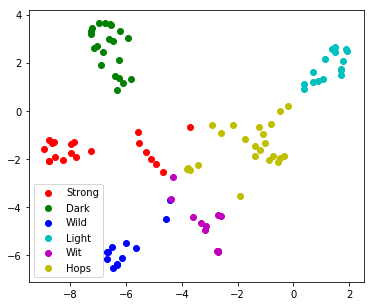

In [247]:
plt.figure(figsize=(6, 5))
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k', 'w', 'orange', 'purple']
for i, c, label in zip(range(104), colors, groups.values()):
    plt.scatter(tsne1[grouplabel == i, 0], tsne1[grouplabel == i, 1], c=c, label=label)
plt.legend()
plt.show();

In [248]:
tsne3dim = TSNE(n_components=3, random_state=42)
tsne2 = tsne3dim.fit_transform(nmf.components_.T)

In [249]:
tsne2

array([[ -32.738373  ,   36.84004   ,  -28.661716  ],
       [  -5.1693783 ,  166.82982   ,  -20.203577  ],
       [-143.83022   ,   63.06348   , -112.56185   ],
       [-114.480705  ,   67.0049    ,   15.269337  ],
       [  99.25514   ,   -5.9629073 ,  -34.78311   ],
       [  59.057014  ,  -42.159916  ,  126.40908   ],
       [-149.14192   ,  107.607185  ,    9.716423  ],
       [  98.4592    ,  -52.330887  ,   82.89731   ],
       [  49.066387  ,   15.946577  ,   34.089672  ],
       [ -97.87102   ,   29.727562  ,  -82.46567   ],
       [ -77.27664   ,  108.27402   ,  -29.256712  ],
       [ -25.296963  ,  -38.752876  ,  157.21962   ],
       [-109.102905  ,  -39.81225   ,   90.00308   ],
       [ -68.787     ,   33.911057  ,  100.546616  ],
       [  14.840098  ,  152.28117   ,   56.384903  ],
       [ -77.42294   ,   26.965471  ,   41.242798  ],
       [   7.3220263 ,  -96.91193   ,  -62.94307   ],
       [  42.911175  ,  -86.984024  ,   99.24722   ],
       [ 100.018295  ,  -47.

In [271]:
colors = {0 : 'rgb(191, 57, 9)',
          1 : 'rgb(58, 24, 1)',
          2 : 'rgb(224, 122, 13)',
          3 : 'rgb(252, 239, 156)',
          4 : 'rgb(186, 167, 1)',
          5 : 'rgb(26, 188, 45)'
         }

In [273]:

trace1 = go.Scatter3d(
    x=tsne2[grouplabel == 0, 0],
    y=tsne2[grouplabel == 0, 1],
    z=tsne2[grouplabel == 0, 2],
    mode='markers',
    marker=dict(
        color=colors[0],
        size=12,
        symbol='circle',
        line=dict(
            color='rgb(204, 204, 204)',
            width=1
        ),
        opacity=0.9
    )
)

trace2 = go.Scatter3d(
    x=tsne2[grouplabel == 1, 0],
    y=tsne2[grouplabel == 1, 1],
    z=tsne2[grouplabel == 1, 2],
    mode='markers',
    marker=dict(
        color=colors[1],
        size=12,
        symbol='circle',
        line=dict(
            color='rgb(204, 204, 204)',
            width=1
        ),
        opacity=0.9
    )
)
trace3 = go.Scatter3d(
    x=tsne2[grouplabel == 2, 0],
    y=tsne2[grouplabel == 2, 1],
    z=tsne2[grouplabel == 2, 2],
    mode='markers',
    marker=dict(
        color=colors[2],
        size=12,
        symbol='circle',
        line=dict(
            color='rgb(204, 204, 204)',
            width=1
        ),
        opacity=0.9
    )
)
trace4 = go.Scatter3d(
    x=tsne2[grouplabel == 3, 0],
    y=tsne2[grouplabel == 3, 1],
    z=tsne2[grouplabel == 3, 2],
    mode='markers',
    marker=dict(
        color=colors[3],
        size=12,
        symbol='circle',
        line=dict(
            color='rgb(204, 204, 204)',
            width=1
        ),
        opacity=0.9
    )
)
trace5 = go.Scatter3d(
    x=tsne2[grouplabel == 4, 0],
    y=tsne2[grouplabel == 4, 1],
    z=tsne2[grouplabel == 4, 2],
    mode='markers',
    marker=dict(
        color=colors[4],
        size=12,
        symbol='circle',
        line=dict(
            color='rgb(204, 204, 204)',
            width=1
        ),
        opacity=0.9
    )
)
trace6 = go.Scatter3d(
    x=tsne2[grouplabel == 5, 0],
    y=tsne2[grouplabel == 5, 1],
    z=tsne2[grouplabel == 5, 2],
    mode='markers',
    marker=dict(
        color=colors[5],
        size=12,
        symbol='circle',
        line=dict(
            color='rgb(204, 204, 204)',
            width=1
        ),
        opacity=0.9
    )
)
data = [trace1, trace2, trace3, trace4, trace5, trace6]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=data, layout=layout)
plot(fig)

'file:///home/michael/Documents/Projects/beerreview/temp-plot.html'